# Project 2
by:
- Rebecca Kuhlman
- Michael Amberg
- Sam Yao

## Business Understanding
Identifying the type of brain tumor a patient has is an important step in figuring out the treatment plan of a patient. They can be diagnosed via MRI imaging, leading to interest in using machine learning to diagnose the patient. Having a second opinion on brain tumor diagnoses would help improve patient care and outcomes, and lessen stress on doctors. A machine learning model could also speed up analysis time and pick out which patients are in need of urgent treatment.

In this dataset, there is glioma, meningioma, and pituitary tumors, as well as MRI images with no tumors.
Glioma tumors are usually malignant, while meningioma and pituitary tumors are usually benign. Different types of tumors are made of different types of cells and have a location where they are most likely to be located.
More information can be found at: https://www.mayoclinic.org/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084

There are many other types of tumors that future algorithms will be need to address. The majority of other types of tumors are more common in children, while the set we are dealing with are all adult brain images.

Because the model deals with health conditions that have extreme affects on the patient, model accuracy is extremely important. Furthermore, accuracy must fine-tuned to avoid fatal misdiagnosis. While incorrectly marking a patient with a benign tumor as malignant is wasteful, the adverse affects are minimal. Inversely, misdiagnosing a malignant tumor as benign may have fatal effects for the patient. Therefore, the designed model must minimize the rate of false negatives with accuracy of 95% or more.

It should be noted that the majority of misdiagnose of brain tumors happen before a brain scan or related test is ordered.
https://paulandperkins.com/brain-tumors/


## Data Preparation

Several helpful sources that helped this part of the section include:
- [1] https://pillow.readthedocs.io/en/stable/handbook/tutorial.html
- [2] https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

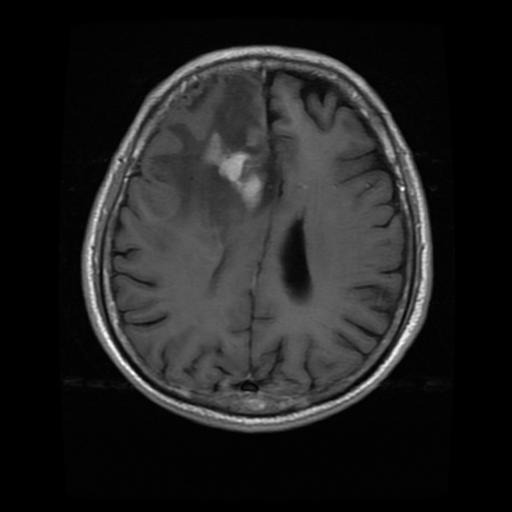

glioma tumor


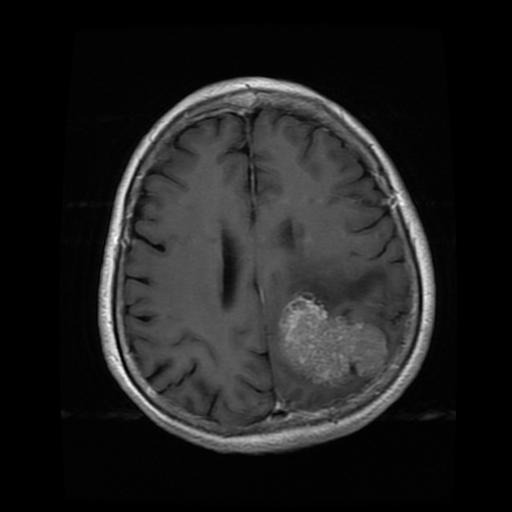

meningioma tumor


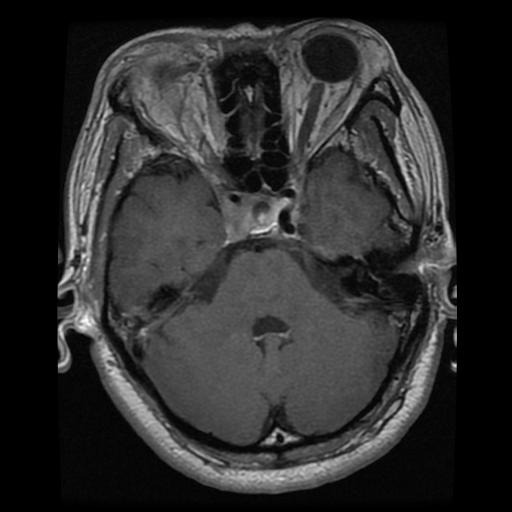

pituitary tumor


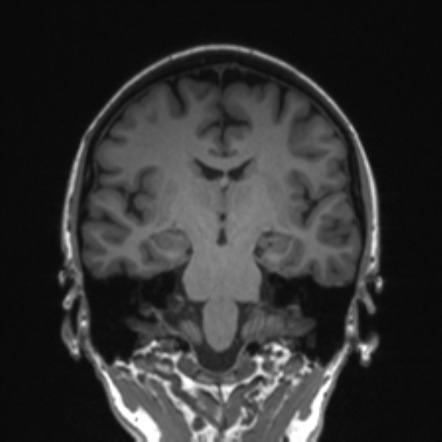

no tumor


In [25]:
import pandas as pd
import numpy as np
import os
from PIL import Image # Utilized Source [2]

display(Image.open("./Training/glioma_tumor/gg (5).jpg"))
print("glioma tumor")
display(Image.open("./Training/meningioma_tumor/m (5).jpg"))
print("meningioma tumor")
display(Image.open("./Training/pituitary_tumor/p (5).jpg"))
print("pituitary tumor")
display(Image.open("./Training/no_tumor/5.jpg"))
print("no tumor")

# This method creates the data, whether training or testing, in the form we desire
# Uses code from source [2] to create the training datasets
def create_dataset(img_folder):
    # Read through all files in "./Training"
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path).convert("L")) # greyscales the image
            image = np.resize(image, (1,262144,1)) #Vectorizes each image
            image = image.astype('float32')
            #image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    # return array with training data.
    return img_data_array, class_name

In [12]:
df_training, training_classes = create_dataset("./Training")
df_testing, testing_classes = create_dataset("./Testing")

In [15]:
df_training[0].shape

(1, 262144, 1)

## Data Reduction

In [ ]:
from sklearn.decomposition import PCA

## Exceptional Work 😡